#TP Procesamiento de Imagenes
##Alumna Farinazzo Analia 24994389@ifts24.edu.ar
##Revisión de pipeline general y pruebas personales

Apunte/teoría:
  Pasos:
  * Obtener la imagen.
  * Preprocesamiento de la imagen:
    -Conversión de Espacio de Color
    -Ajuste de Iluminación y Contraste
    -Filtrado
    -Redimensionamiento
    -Recorte
  * Segmentación:
    -Umbralización
    -Detección de Bordes
    -Agrupamiento
    -Segmentación basada en Regiones
  * Extracción de Características
    -Características de Textura
    -Características de Forma
    -Puntos Claves y Descriptores
    -Histograma de Color
  * Analisis y Reconocimiento
    -Clasificación
    -Detección de Objetos
    -Reconocimiento de Objetos
    -Seguimiento de Objetos
  *Interpretación y Visualización

  Los pasos a aplicar dependen de la imagen, y el objetivo que buscamos.  Según el caso, es posible que se llegue al objetivo cumpliendo solo algunos.

  Python:  Librerías:
  Scikit-Image:  Segmentación, Extracción de Características.
  CV2:  OpenCv - ComputerVision - Procesamiento de Imagen.  
  Watermark:  Permite obtener información del ambiente, versión de las librerías, etc.

Definiciones:  
Muestreo espacial: Convertir una imagen continua en una matriz discreta de píxeles

Cuantización: Asignar valores discretos a la intensidad de cada píxel (disminución de los grises de la escala)



###  Consignas
Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.
b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.
c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

Ejercicio 2: Muestreo y Cuantización


a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.
b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos
c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)
d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

Ejercicio 3: Segmentación por Color


Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.
b) Calcular y mostrar el histograma de la imagen en escala de grises.
c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.
d) Dibujar los bordes del objeto segmentado en color rojo.

Criterios de Evaluación:

Correcta implementación del código (40%)
Comprensión de los conceptos teóricos demostrada en las explicaciones (30%)
Análisis de resultados y conclusiones (20%)
Claridad en la presentación de resultados (10%)

In [3]:
##Instalo la librería por si no existe en el ambiente de Colab.
!pip install scikit-image -q
!pip install Pillow -q


In [4]:
#Importo las libreías que vamos a utilizar.  numpy para el manejo de calculos matemáticos,
#trabajo con matrices y listas/tuplas, diccionarios, etc.
#cv2 para OpenCv, librería para el procesamiento de imagenes y tareas propias de "Computer Vision"
#y matplotlib para las representaciones.

import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from PIL import Image

In [5]:
# Conecto el Drive donde tengo alojada la imagen
from google.colab import drive
import os

# Monto el drive (conecto el drive con el colab)
drive.mount("/content/drive/", force_remount=True)
#fuerzo el remount por si ejecuto varias veces y ya estaba montado.

# Cambio el directorio para posicionarme donde están las imágenes.
os.chdir('/content/drive/MyDrive/EntregaTPProcesamientoImg/ImagenesPrueba/')

Mounted at /content/drive/


In [6]:
#Tomo y "leo" la imagen elegida desde el drive.
abstracto1 = imread('papercut_abstracto1.jpg')
plt.title("Modo de color: BGR(Modo openCV)")
plt.imshow(abstracto1)
plt.show()

#Se pudo observar que con el plot la imagen no se ve con los colores originales.
#Se debe al espacio de color con el que normalmente trabaja la bilbioteca OpenCv.

#Entonces, tengo dos formas de ver la imagen con sus colores originales.

#  Opción de parche de opencv.
print("Colores originales desde cv2 imshow")
cv2_imshow(abstracto1)

#Convertir el modo de color para evitar la discrepancia entre opencv y matplotlib.
abstracto2 = cv2.cvtColor(abstracto1, cv2.COLOR_BGR2RGB)
plt.title("Modo de color: RGB (Original) - Convertido")
plt.imshow(abstracto2)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

### Primeros análisis sobre la imagen.

In [7]:
#Verifico el tipo de objeto que generamos al obtener la imagen.

type(abstracto1)

#ambas imagenes son matrices de numpy.  Esto permite aplicarle funciones mateméticas y lógicas.
#Expresado como una matriz cada punto (pixel) de la imagen es un punto dado por una coordenada (X,Y) donde se
#almacenan valores o caracterísitcas del pixel (Intensidad (Grises) o los composión de color (RGB/BGR/CMYK (no tan común))).

numpy.ndarray

In [8]:
#Continuamos con el análisis básico de la imagen

def data_img(vars):
  print('Tamaño = ',vars.shape)  #Alto, Ancho, Canales de Color.
  print('Max  = ',np.max(vars))
  print('Min  = ',np.min(vars))

data_img(abstracto1)

Tamaño =  (3928, 5884, 3)
Max  =  243
Min  =  0


In [9]:
#Continuamos con el análisis básico de la imagen

data_img(abstracto2)

Tamaño =  (3928, 5884, 3)
Max  =  243
Min  =  0


In [10]:
#Pregunto que formato de color compone las imagenes, basado en su "shape".

def formato_color(vars):
  if len(vars.shape) == 3 and vars.shape[2] == 3:
    print('Formato de Color = RGB/BGR (dependiendo de como fue leída)')
  elif len(vars.shape) == 2:
    print('Formato de Color = Escala de Grises')

formato_color(abstracto1)
formato_color(abstracto2)


Formato de Color = RGB/BGR (dependiendo de como fue leída)
Formato de Color = RGB/BGR (dependiendo de como fue leída)


In [11]:
# Otras informaciones básicas de la imagen
print("Tipo de datos:", abstracto1.dtype)
print("Tamaño en memoria (bytes):", abstracto1.nbytes)

Tipo de datos: uint8
Tamaño en memoria (bytes): 69337056


In [12]:
#Pasamos al análisis de los diferentes canales de color.
#Considerar que cada canal tiene un indice de 0 a 2, donde 0 es Azul (B), 1 es Verde (G) y 2 es Rojo (R).-

azul=abstracto1[:,:,0]
verde=abstracto1[:,:,1]
rojo=abstracto1[:,:,2]

print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {azul.min()}, Valor máximo: {azul.max()}, Promedio: {azul.mean():.2f}")
cv2_imshow(azul)


Output hidden; open in https://colab.research.google.com to view.

In [13]:
print("Estadísticas del canal Verde:")
print(f"Valor mínimo: {verde.min()}, Valor máximo: {verde.max()}, Promedio: {verde.mean():.2f}")
cv2_imshow(verde)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
print("Estadísticas del canal Rojo:")
print(f"Valor mínimo: {rojo.min()}, Valor máximo: {rojo.max()}, Promedio: {rojo.mean():.2f}")
cv2_imshow(rojo)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
#Analizando las estadísticas canal por canal, podemos concluir que el máximo que obtuvimos
#sobre la imagen total, se encuentra en en el canal Rojo.
#Y el mínimo, se da tanto en el canal rojo como en el verde.

In [16]:
# Comparación en una única línea de las imágenes en cada canal.
comp = np.hstack((azul,verde,rojo))
cv2_imshow(comp);

Output hidden; open in https://colab.research.google.com to view.

Si analizamos los promedios de cada canal, a pesar de no contar con la intensidad máxima, el mayor promedio se encuentra en el canal AZUL.


###Muestreo Espacial

In [17]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx,Cx) = abstracto1.shape  # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d (Filas)
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [18]:
# Verifico los valores obtenidos hasta ahora.

print ('Filas Originales: '+ str(Nx) + ' | Nuevas Filas: ' + str(Ny) )
print ('Columnas Originales: '+ str(Mx) + ' | Columnas Filas: ' + str(My) )

#Podemos concluir que al tomar 1 de cada 2 pixeles, logicamente la resolución se reduce a la mitad.

Filas Originales: 3928 | Nuevas Filas: 1964
Columnas Originales: 5884 | Columnas Filas: 2942


In [19]:
def howis(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto -> más blanco
    print('Mínimo =', np.min(img))   # Valor más bajo -> más negro

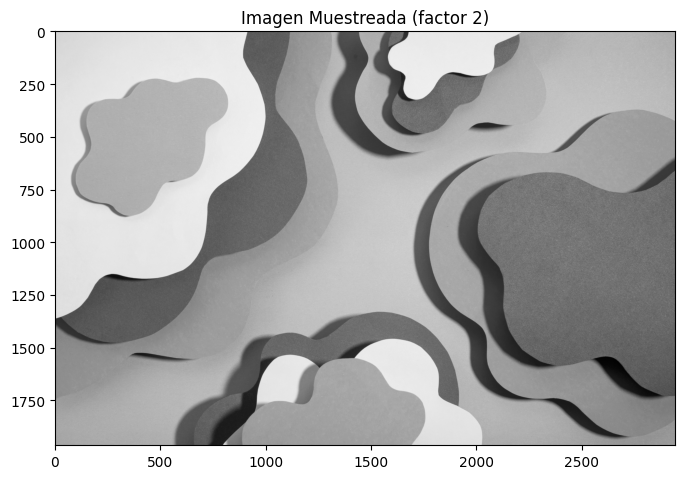

Tamaño = (1964, 2942)
Máximo = 233
Mínimo = 1
Resolución reducida de 3928x5884 a 1964x2942 pixels


In [20]:
#Obtengamos la imagen "submuestreada" (downsampling)

SubAzul = np.zeros((Ny,My), np.uint8)  #Inicializo la matriz de la muestra.
for i in range(Ny):
    for j in range(My):
      SubAzul[i,j] = azul[ix[i],jx[j]]
#En este for, aplico realmente el rezise o downsampling, en la nueva matriz "SubAzul" desde la imagen tomada del canal Azul
#En el código posterior, tomamos la nueva matriz SubAzul, y la mostramos gráficamente.

#Al probar con la imagen original abstracto1, dumpea el programa, porque al inicializar la matriz
#esta ya no esperaba los tres canales, sino uno solo.
#En este caso, optamos por el Azul, porque era el que más información tenía.

plt.figure(figsize=(8,8))
plt.imshow(SubAzul, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(SubAzul)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

Ingrese el canal a analizar en la nueva imagen  :azul
Ingrese el factor a aplicar para el downsampling en la nueva imagen  :16


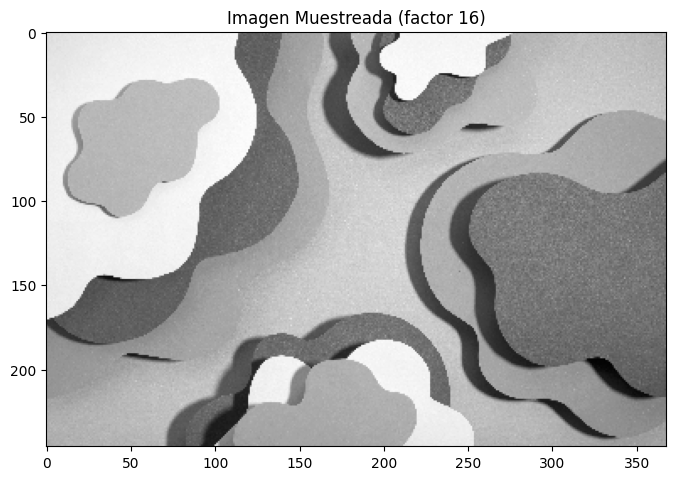

Tamaño = (246, 368)
Máximo = 222
Mínimo = 1
Resolución reducida de 3928 x 5884 a 246 x 368 pixels
Se muestra el canal azul en escala de Grises
Se redujeron los datos en un  99.609375 %


In [21]:
#Convertimos el código de muestreo para que pregunte que factor queremos usar, y de esta
#forma obtener la misma imagen, en diferentes factrores.
#Y también que canal se quiere analizar así también lo aplicamos a la imagen resultante.

color_input= input("Ingrese el canal a analizar en la nueva imagen  :")
factor= int(input("Ingrese el factor a aplicar para el downsampling en la nueva imagen  :"))

if color_input == "azul":
    color_channel = azul
elif color_input == "verde":
    color_channel = verde
elif color_input == "rojo":
    color_channel = rojo
else:
    print("Canal de color inválido. Usando azul por defecto.")
    color_channel = azul

(Nx,Mx,Cx) = abstracto1.shape
ix = range(0,Nx,factor)
jx = range(0,Mx,factor)
Ny = len(ix)
My = len(jx)
SubImg = np.zeros((Ny,My), np.uint8)  #Inicializo la matriz de la muestra.
for i in range(Ny):
  for j in range(My):
    SubImg[i,j] = color_channel[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(SubImg, cmap='gray')
plt.title(f'Imagen Muestreada (factor {factor})')
plt.show()
howis(SubImg)
print(f'Resolución reducida de {Nx} x {Mx} a {Ny} x {My} pixels')
print("Se muestra el canal " + color_input + " en escala de Grises")
redu_total=factor*factor
porc_redu=(1-(1/redu_total))*100
print('Se redujeron los datos en un  ' + str(porc_redu) + ' %')


### Cuantización

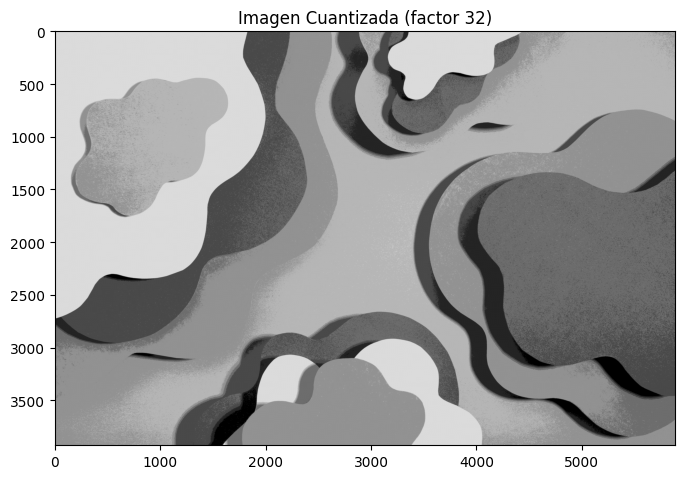

Tamaño = (3928, 5884)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [22]:
q1 = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
q32 = np.floor(azul/q1)*q1      # Agrupa valores en intervalos de tamaño q
q32 = q32.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(q32, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q1})')
plt.show()
howis(q32)
print(f'Esta imagen tiene {int(256/q1)} niveles de gris (original: 256)')

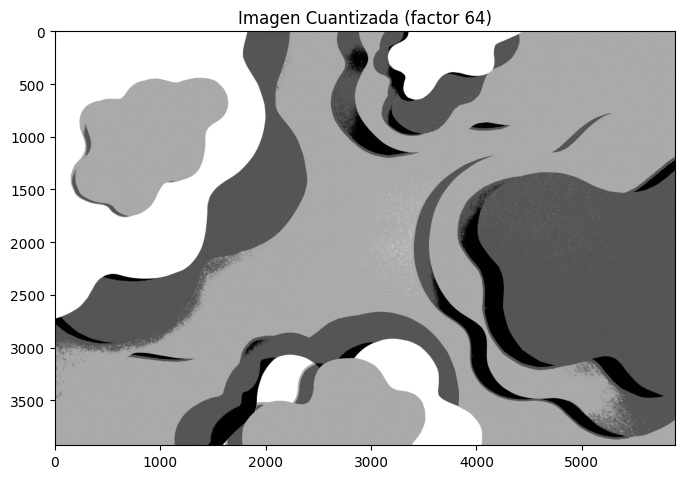

Tamaño = (3928, 5884)
Máximo = 192
Mínimo = 0
Esta imagen tiene 4 niveles de gris (original: 256)


In [23]:
q2 = 64                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
q64 = np.floor(azul/q2)*q2      # Agrupa valores en intervalos de tamaño q
q64 = q64.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(q64, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q2})')
plt.show()
howis(q64)
print(f'Esta imagen tiene {int(256/q2)} niveles de gris (original: 256)')

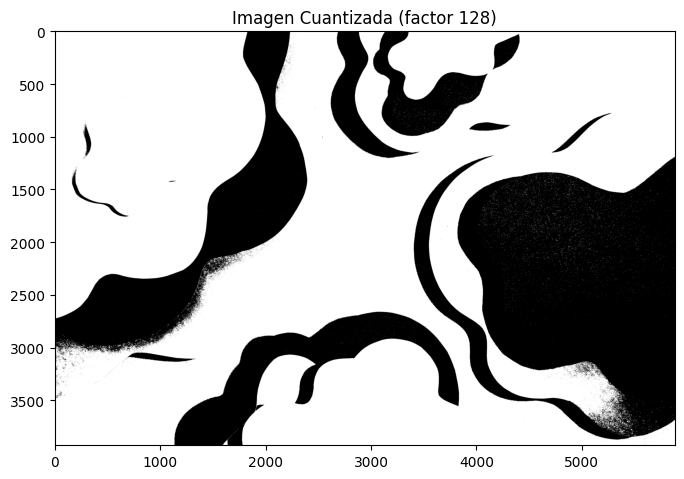

Tamaño = (3928, 5884)
Máximo = 128
Mínimo = 0
Esta imagen tiene 2 niveles de gris (original: 256)


In [24]:
q3 = 128                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
q128 = np.floor(azul/q3)*q3      # Agrupa valores en intervalos de tamaño q
q128 = q128.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(q128, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q3})')
plt.show()
howis(q128)
print(f'Esta imagen tiene {int(256/q3)} niveles de gris (original: 256)')

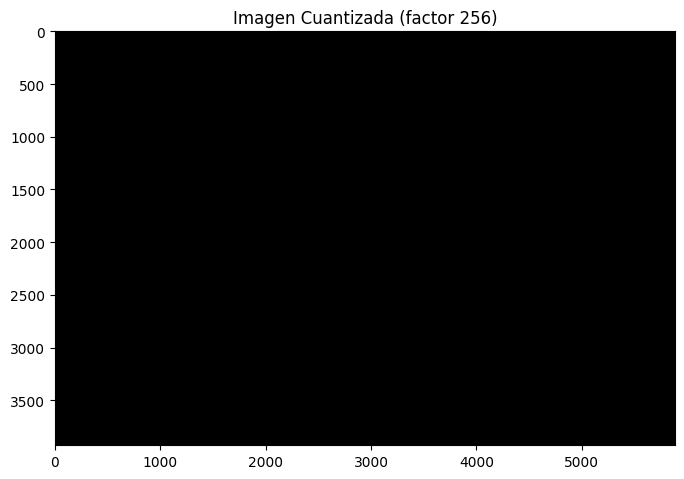

Tamaño = (3928, 5884)
Máximo = 0
Mínimo = 0
Esta imagen tiene 1 niveles de gris (original: 256)


In [25]:
q4 = 256                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
q256 = np.floor(azul/q4)*q4      # Agrupa valores en intervalos de tamaño q
q256 = q256.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(q256, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q4})')
plt.show()
howis(q256)
print(f'Esta imagen tiene {int(256/q4)} niveles de gris (original: 256)')

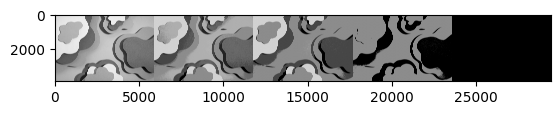

In [26]:
# Comparación en una única línea de las imágenes del canal azul, en cada cuantización.
comp_q = np.hstack((azul,q32,q64,q128,q256))
plt.imshow(comp_q, cmap='gray')
plt.show()

A mi entender a partir de una cuantización con factor 64, la imagen ya está degrada, dado que empiezan a perderse los límites de ciertos objetos.


Comparación de los Histogramas de una imagen con muestreo y una cuantizada.

In [27]:
def hist(SubAzul):
    h = np.zeros(256)                       # Vector para contar ocurrencias
    for i in range(SubAzul.shape[0]):       # Para cada fila
        for j in range(SubAzul.shape[1]):   # Para cada columna
            h[SubAzul[i,j]] += 1            # Incrementa contador del valor
    return h

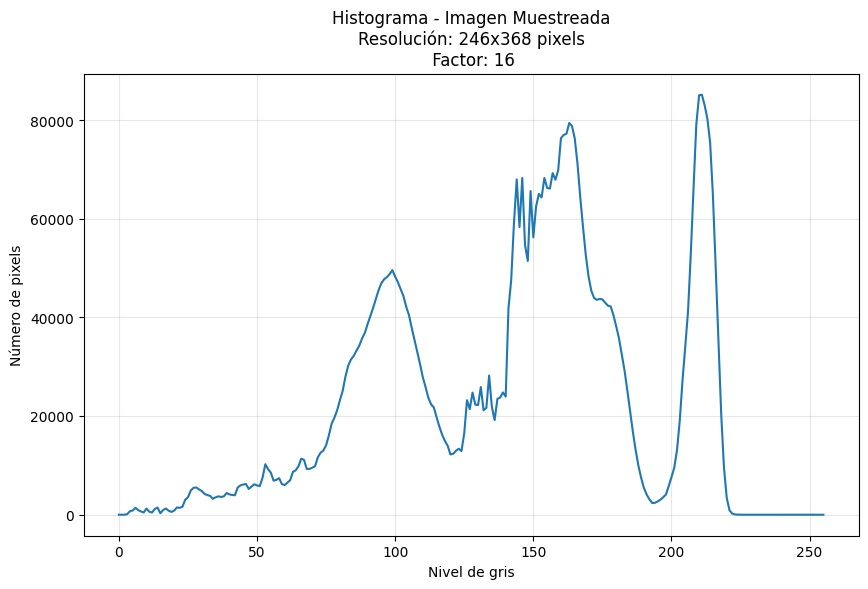

In [28]:
# Histograma imagen muestreada
plt.figure(figsize=(10,6))
plt.plot(hist(SubAzul))
plt.title(f'Histograma - Imagen Muestreada\nResolución: {Ny}x{My} pixels\n Factor: {factor}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

#Ojo ->  Muestra la imagen según el último factor de muestreo que se haya ingresado como variable.

En el caso de la imagen con un muestreo de factor 16, se puede observar que el máximo de intensidad que se indicó en el análisis, coincide con el pico máximo del histograma.  En este caso era 222.

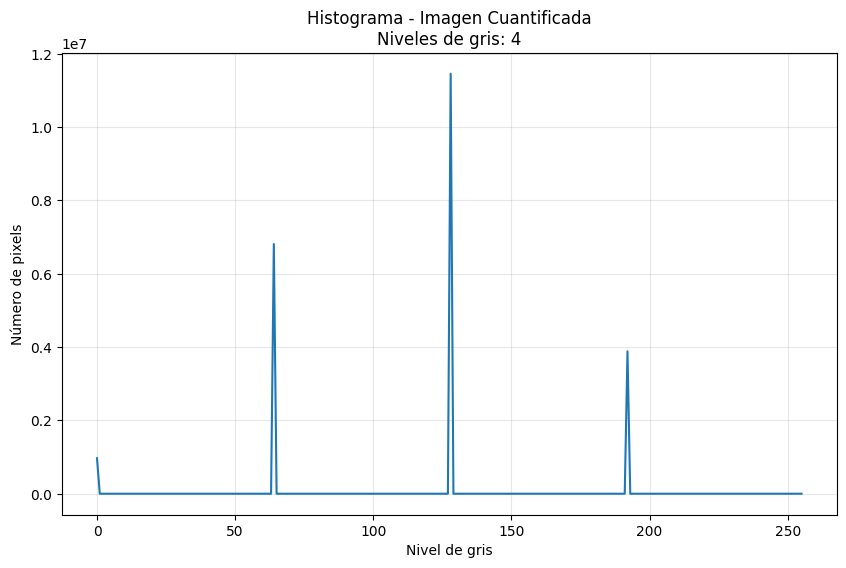

In [29]:
# Histograma imagen cuantizada
#factor 32=variable q1 imagen q32
#factor 64=variable q2 imagen q64
#factor 128=variable q3 imagen q128
#factor 256=variable q4 imagen q256

plt.figure(figsize=(10,6))
plt.plot(hist(q64))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q2)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

En el caso del histograma asociado con la imagen cuantizada, se pueden observar tantos "picos", como niveles de gris se encuentran en la imagen.
Deberíamos corroborar que la correlación entre niveles de gris y cantidad de pixeles que se marcan en el histograma, sea correcta.

### Segmentación por color.


Recordemos los datos de la imagen original, y vayamos paso a paso segmentándola.

In [30]:
abstracto3 = imread('papercut_abstracto1.jpg')
cv2_imshow(abstracto3)
data_img(abstracto3)

Output hidden; open in https://colab.research.google.com to view.

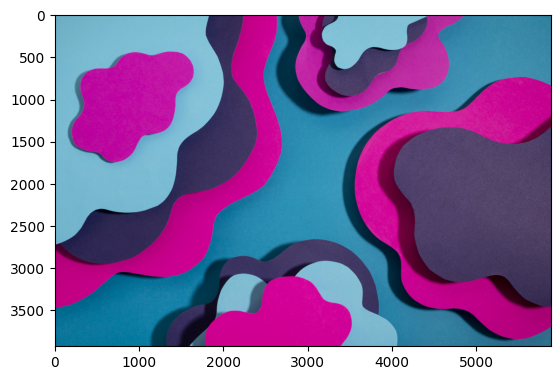

In [31]:
# Conversión BGR a RGB
abstracto_rgb = abstracto3[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(abstracto_rgb)
plt.show()

In [32]:
# Separación de canales de color
rojo_s = abstracto_rgb[:,:,0]
verde_s = abstracto_rgb[:,:,1]
azul_s = abstracto_rgb[:,:,2]
canales = np.concatenate((rojo_s,verde_s,azul_s),axis=1)
cv2_imshow(canales)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
# Conversión a escala de grises
rojo_f = rojo_s.astype(float)
verde_f = verde_s.astype(float)
azul_f = azul_s.astype(float)
# Promedio ponderado (Tercios)
peso = (1/3,1/3,1/3)
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
data_img(gris)
print('Promedio:  ' + str(np.mean(gris)))
cv2_imshow(gris)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
# Función para mostrar histograma
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()


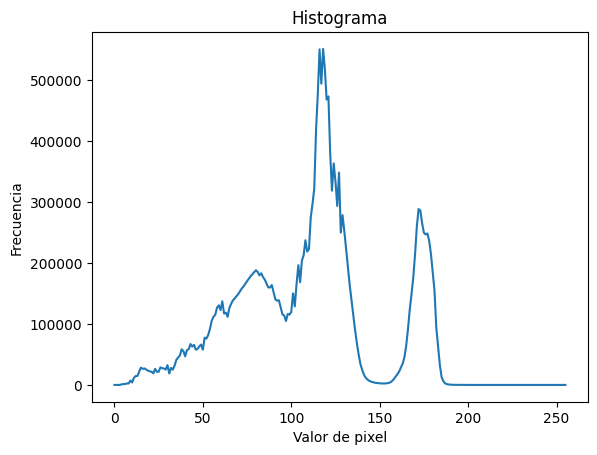

In [35]:
histograma(gris)

Tamaño =  (700, 1250, 3)
Max  =  227
Min  =  0
Promedio:  135.9765558095238


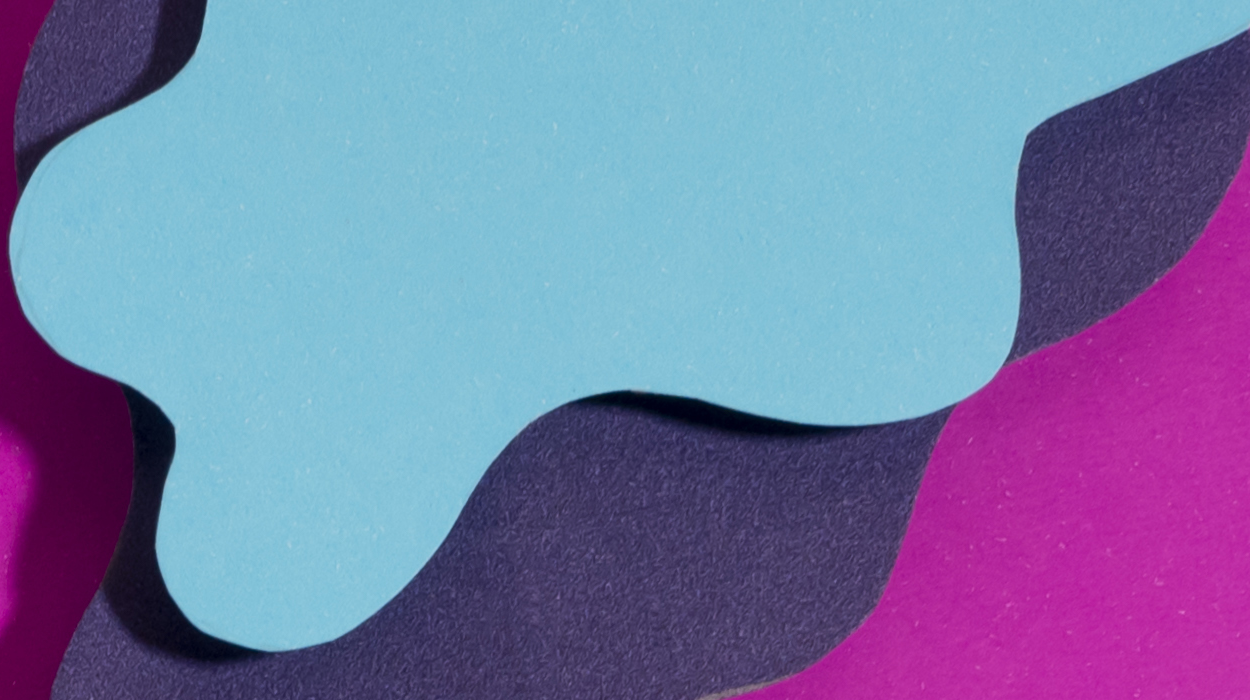

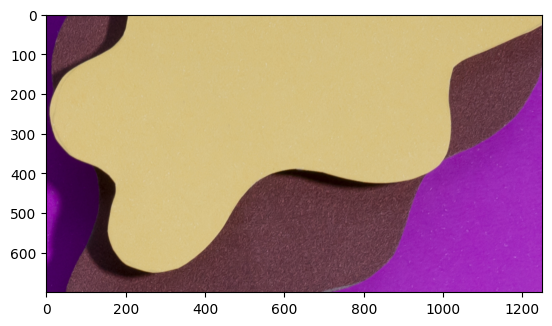

In [36]:
#Vamos a intentar obtener el objeto celeste que se encuentra arriba, casi a la derecha de la imagen.
#Les dejo acá la muestra del objeto referenciado.  (Roi -> Región de Interés)

# Alto x Ancho -> Cordenadas [X:Y]
nube = abstracto3[0:700, 3150:4400]
data_img(nube)
print('Promedio:  ' + str(np.mean(nube)))
cv2_imshow(nube)

plt.imshow(nube)
plt.show()


In [37]:
#Voy a crear una función con la que inspeccionar algunos pixeles de la imagen, con el objetivo de obtener umbrales más exactos.

def obtener_rgb_pixel_cv2(imagen_np, x, y):
    try:  #Validaciones para evitar errores por argumentos que se encuentran por fuera de la imagen o por imagenes con formato erróneo, etc.
        alto, ancho, canales = imagen_np.shape
        if 0 <= y < alto and 0 <= x < ancho:
            # OpenCV almacena los canales en formato BGR, y procedemos a reordenarlos en formato RGB.
            b, g, r = imagen_np[y, x]
            return (r, g, b)  # Return as RGB
        else:
            print(f"Advertencia: Las coordenadas ({x}, {y}) están fuera de los límites de la imagen ({ancho}x{alto}).")
            return None
    except AttributeError:
        print("Error: El argumento 'imagen_np' no es un array NumPy válido o la imagen no se cargó correctamente.")
        return None
    except IndexError:
        print("Error: Índice fuera de rango al acceder al píxel.")
        return None
    except Exception as e:
        print(f"Ocurrió un error al obtener el píxel: {e}")
        return None
try:

    if nube is not None:
        # Coordenadas del píxel que quieres consultar
        coordenada_x = 200 #-> estas coordenadas se obtuvieron del plt del segmento.
        coordenada_y = 600

        valores_rgb = obtener_rgb_pixel_cv2(nube, coordenada_x, coordenada_y)

        if valores_rgb:
            print(f"El valor RGB del píxel en ({coordenada_x}, {coordenada_y}) es: {valores_rgb}")

except Exception as e:
    print(f"Ocurrió un error general: {e}")


El valor RGB del píxel en (200, 600) es: (np.uint8(137), np.uint8(198), np.uint8(219))


In [38]:
# Voy a inspeccionar los valores RGB de algunos píxeles del objeto celeste en la imagen recortada
# y determinar un rango aproximado. Esto es solo un ejemplo, los valores reales dependerán de tu imagen.

color_celeste_ejemplo = [137, 198, 219]  # Un valor RGB aproximado del celeste.  Los obtuvimos del análisis del pixel anterior

# Define un rango de tolerancia para cada canal (R, G, B)
tolerancia = 30

lower_bound = np.array([max(0, color_celeste_ejemplo[0] - tolerancia),
                        max(0, color_celeste_ejemplo[1] - tolerancia),
                        max(0, color_celeste_ejemplo[2] - tolerancia)])

upper_bound = np.array([min(255, color_celeste_ejemplo[0] + tolerancia),
                        min(255, color_celeste_ejemplo[1] + tolerancia),
                        min(255, color_celeste_ejemplo[2] + tolerancia)])

print("Rango inferior:", lower_bound)
print("Rango superior:", upper_bound)


Rango inferior: [107 168 189]
Rango superior: [167 228 249]


In [39]:
def aislar_segmento_de_subimagen(imagen_original, sub_imagen):

    try:
        if imagen_original is None:
            print(f"Error al cargar la imagen Original. ")
            return None

        alto_a, ancho_a, _ = imagen_original.shape
        alto_b, ancho_b = sub_imagen.shape

        # Coordenadas de la esquina superior izquierda donde B se encuentra en A
        x_inicio_b_en_a = 0  # Reemplaza con la coordenada real
        y_inicio_b_en_a = 3150  # Reemplaza con la coordenada real

        #Recordemos que nube es el siguiente recorte de abastracto3-> [0:700],[3150:4400]

        # Crear una máscara del tamaño de imagen_original, inicialmente negra
        mascara_a = np.zeros((alto_a, ancho_a), dtype=np.uint8)

        # Insertar la máscara de B en la posición correcta dentro de la máscara de A
        mascara_a[x_inicio_b_en_a:x_inicio_b_en_a + alto_b,
                  y_inicio_b_en_a:y_inicio_b_en_a + ancho_b] = sub_imagen

        # Crear una imagen negra del tamaño de A
        imagen_negra_a = np.zeros_like(imagen_original)

        # Utilizar la máscara para copiar los píxeles de A donde la máscara no es negra
        resultado = np.where(mascara_a[:, :, np.newaxis] > 0, imagen_original, imagen_negra_a)

        return resultado

    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

# Ejemplo de uso (asumiendo que tienes 'papercut_abstracto1.jpg' y 'mascara_b.png'):
ruta_imagen_a = abstracto3
nube_gris= cv2.cvtColor(nube, cv2.COLOR_RGB2GRAY)
cv2.imwrite("nube_gris.jpg", nube_gris)
ruta_mascara_b = "nube_gris.jpg"  # Guarda tu máscara de B como una imagen (blanco sobre negro)

mascara_b_cargada = cv2.imread(ruta_mascara_b, cv2.IMREAD_GRAYSCALE)
if mascara_b_cargada is not None:
    # Asegúrate de que la máscara sea binaria (0 o 255)
    _, mascara_b_binaria = cv2.threshold(mascara_b_cargada, 127, 255, cv2.THRESH_BINARY)
    imagen_segmentada_en_a = aislar_segmento_de_subimagen(ruta_imagen_a, mascara_b_binaria)

    if imagen_segmentada_en_a is not None:
        cv2.imwrite("segmento_en_a.jpg", imagen_segmentada_en_a)
        print("Segmento aislado en la imagen A y guardado como segmento_en_a.png")
else:
    print(f"Error al cargar la máscara de B: {ruta_mascara_b}")



Segmento aislado en la imagen A y guardado como segmento_en_a.png


In [40]:
'''  Este bloque quedó obsoleto al hacer el previo.

#Ahora vamos a hacer una transformación en la imagen para asegurar un resultado óptimo en la segmentación.

def aislar_segmento_por_color(imagen_np, lower_bound, upper_bound):

    # Crea una máscara donde los píxeles dentro del rango son True y fuera son False
    mask = cv2.inRange(imagen_np, lower_bound, upper_bound)

    # Crea una imagen completamente negra del mismo tamaño que la original
    imagen_negra = np.zeros_like(imagen_segmentada_en_a)

    # Utiliza la máscara para copiar solo los píxeles del rango de color a la imagen negra
    resultado = np.where(mask[:, :, np.newaxis] == 255, imagen_np, imagen_negra)

    return resultado

# Ejemplo de uso:
try:
    if nube is not None:
        # Define tus umbrales de color (en formato BGR, ya que OpenCV lo usa por defecto)
        lower_celeste_bgr = np.array([189, 168, 107])  # Ejemplo: Límite inferior BGR
        upper_celeste_bgr = np.array([249, 228, 167]) # Ejemplo: Límite superior BGR

#Rango inferior: [107 168 189] En RGB
#Rango superior: [167 228 249]

        # Llama a la función para aislar el segmento
        imagen_segmentada = aislar_segmento_por_color(imagen_segmentada_en_a, lower_celeste_bgr, upper_celeste_bgr)

        # Guarda la imagen resultante
        cv2.imwrite("segmento_aislado.png", imagen_segmentada)
        print("Segmento aislado y guardado como segmento_aislado.png")

except Exception as e:
    print(f"Ocurrió un error: {e}")

data_img(imagen_segmentada)
print('Promedio:  ' + str(np.mean(imagen_segmentada)))
cv2_imshow(imagen_segmentada)

'''


'  Este bloque quedó obsoleto al hacer el previo.\n\n#Ahora vamos a hacer una transformación en la imagen para asegurar un resultado óptimo en la segmentación.\n\ndef aislar_segmento_por_color(imagen_np, lower_bound, upper_bound):\n\n    # Crea una máscara donde los píxeles dentro del rango son True y fuera son False\n    mask = cv2.inRange(imagen_np, lower_bound, upper_bound)\n\n    # Crea una imagen completamente negra del mismo tamaño que la original\n    imagen_negra = np.zeros_like(imagen_segmentada_en_a)\n\n    # Utiliza la máscara para copiar solo los píxeles del rango de color a la imagen negra\n    resultado = np.where(mask[:, :, np.newaxis] == 255, imagen_np, imagen_negra)\n\n    return resultado\n\n# Ejemplo de uso:\ntry:\n    if nube is not None:\n        # Define tus umbrales de color (en formato BGR, ya que OpenCV lo usa por defecto)\n        lower_celeste_bgr = np.array([189, 168, 107])  # Ejemplo: Límite inferior BGR\n        upper_celeste_bgr = np.array([249, 228, 167]

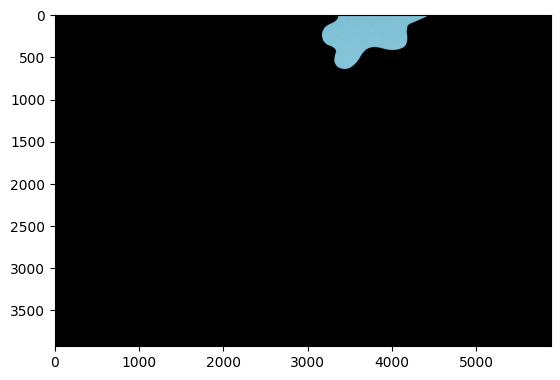

In [41]:
# Conversión BGR a RGB
abstracto_rgb = imagen_segmentada_en_a[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(abstracto_rgb)
plt.show()

In [42]:
# Separación de canales de color
rojo_s = abstracto_rgb[:,:,0]
verde_s = abstracto_rgb[:,:,1]
azul_s = abstracto_rgb[:,:,2]
canales = np.concatenate((rojo_s,verde_s,azul_s),axis=1)
cv2_imshow(canales)

Output hidden; open in https://colab.research.google.com to view.

Tamaño =  (3928, 5884)
Max  =  201
Min  =  0
Promedio:  3.5932525170956207


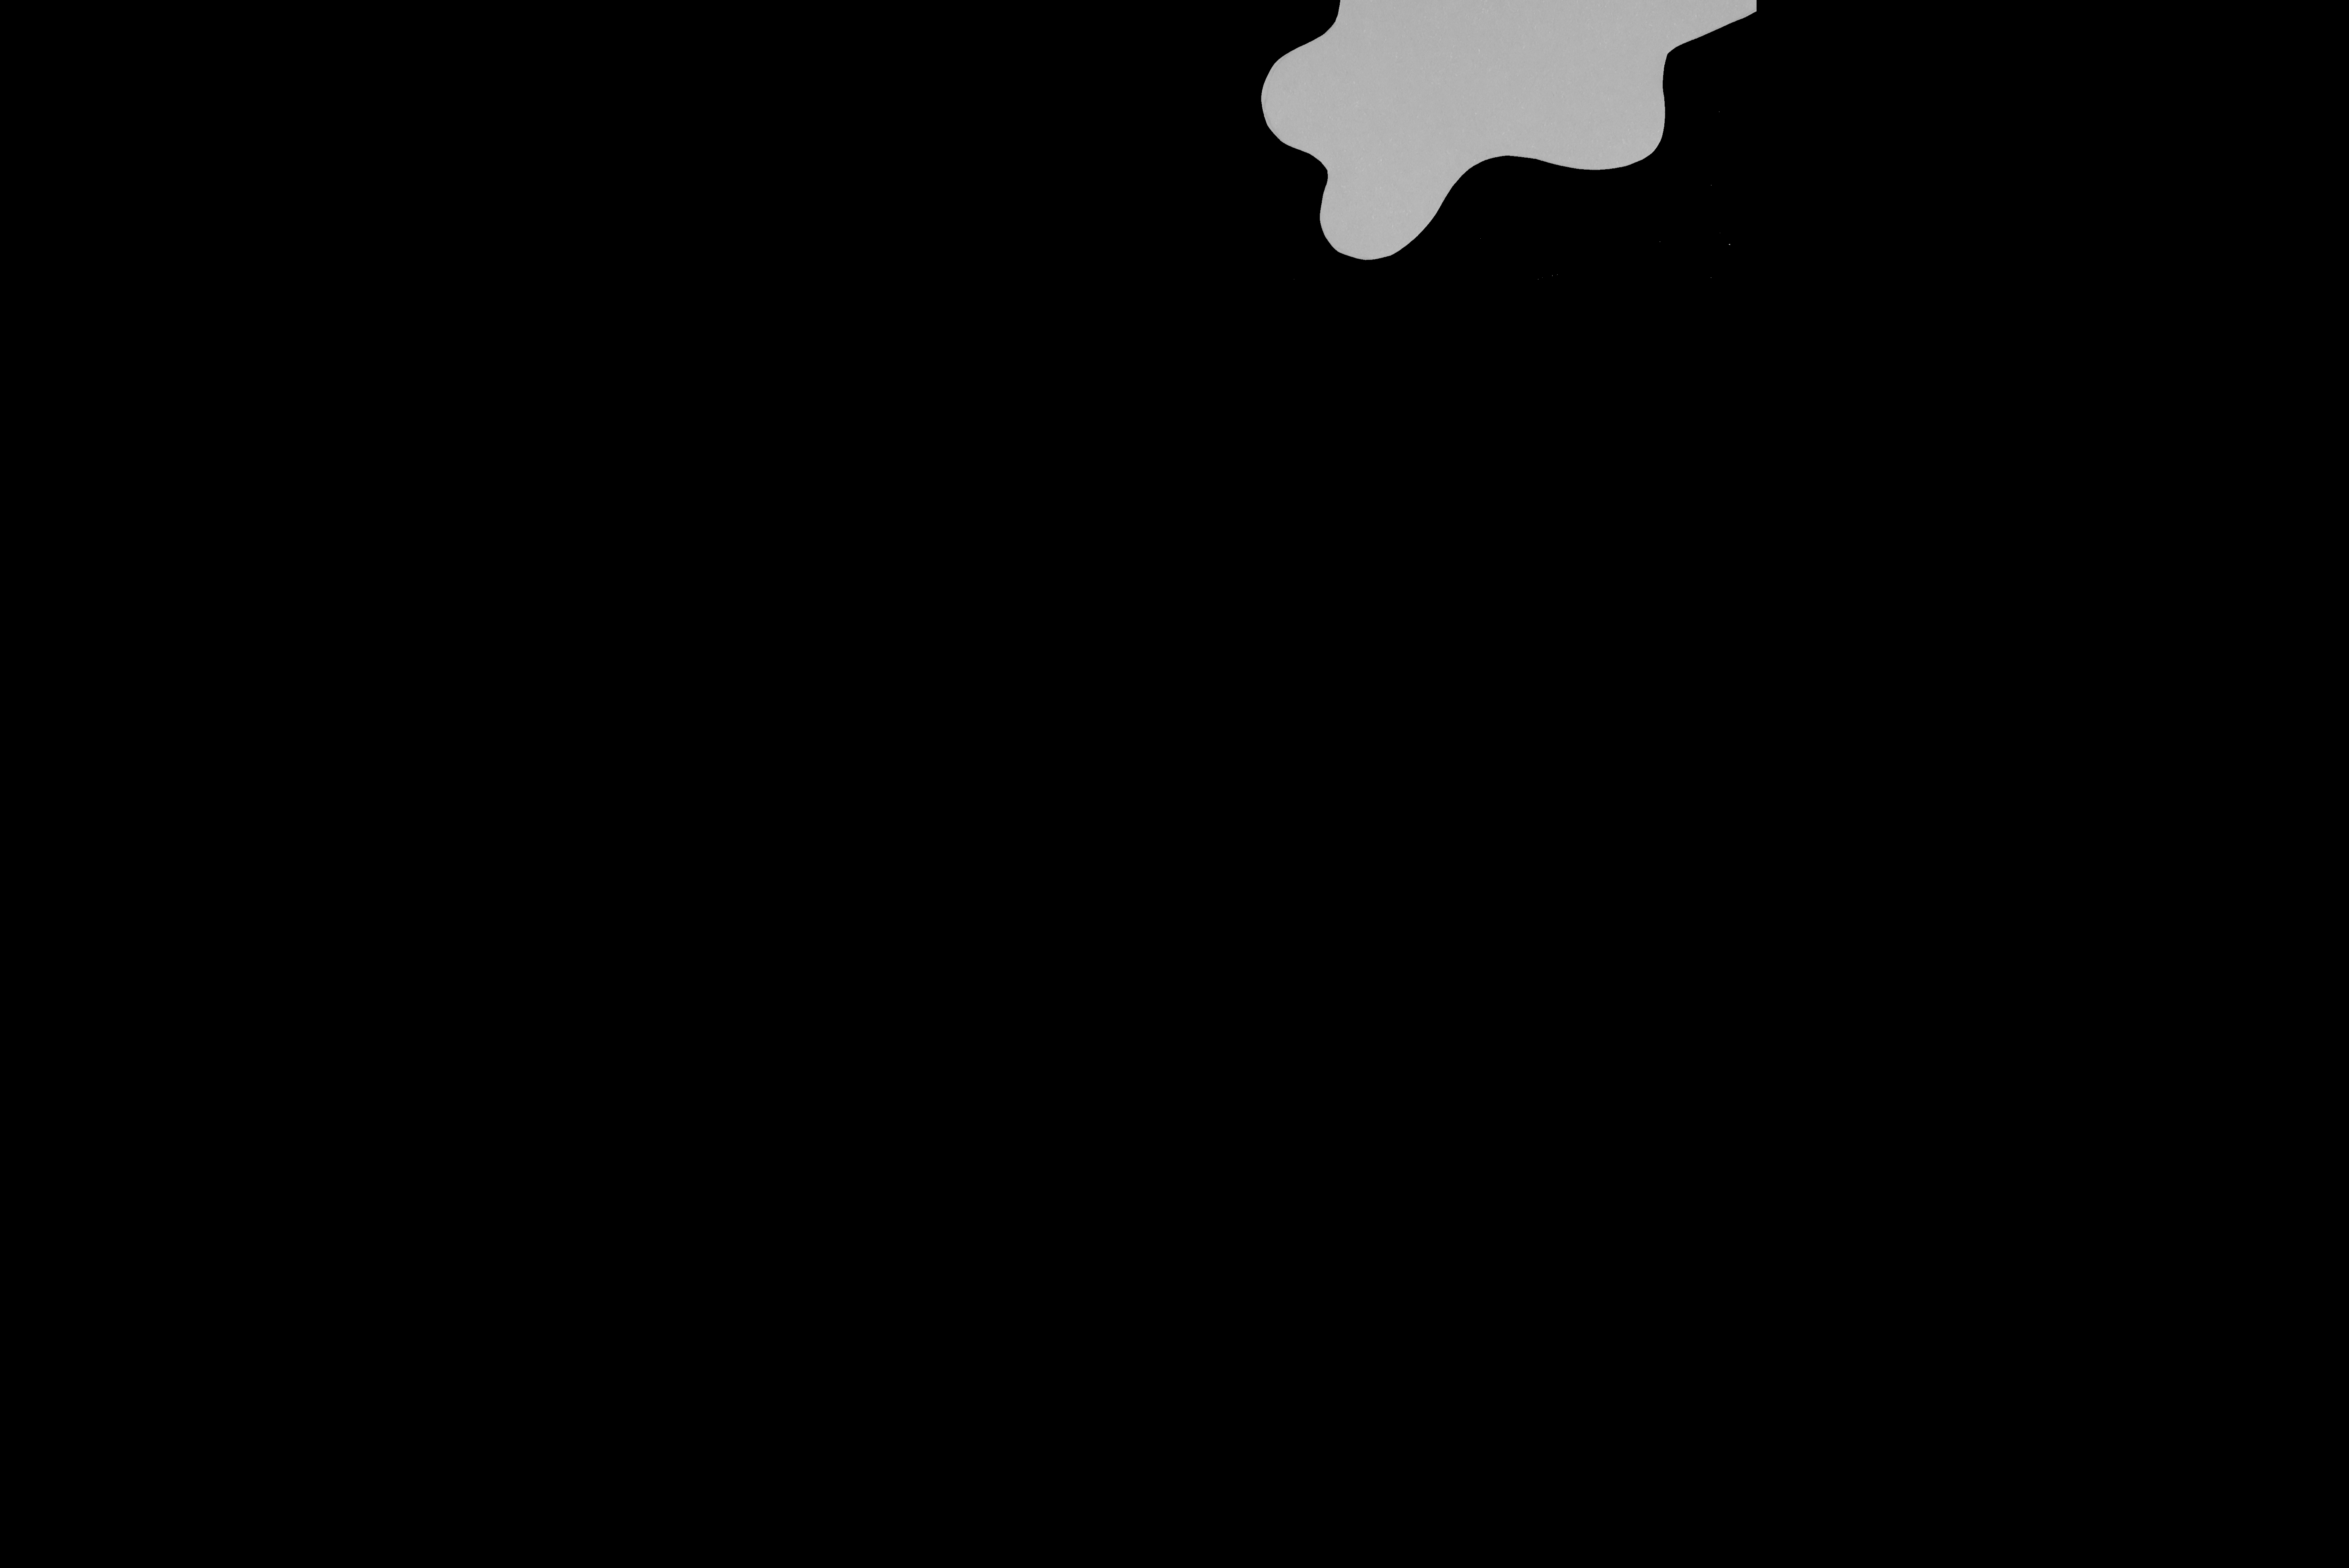

In [43]:
# Conversión a escala de grises
rojo_f = rojo_s.astype(float)
verde_f = verde_s.astype(float)
azul_f = azul_s.astype(float)
# Promedio ponderado (Tercios)
peso = (1/3,1/3,1/3)
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
data_img(gris)
print('Promedio:  ' + str(np.mean(gris)))
cv2_imshow(gris)

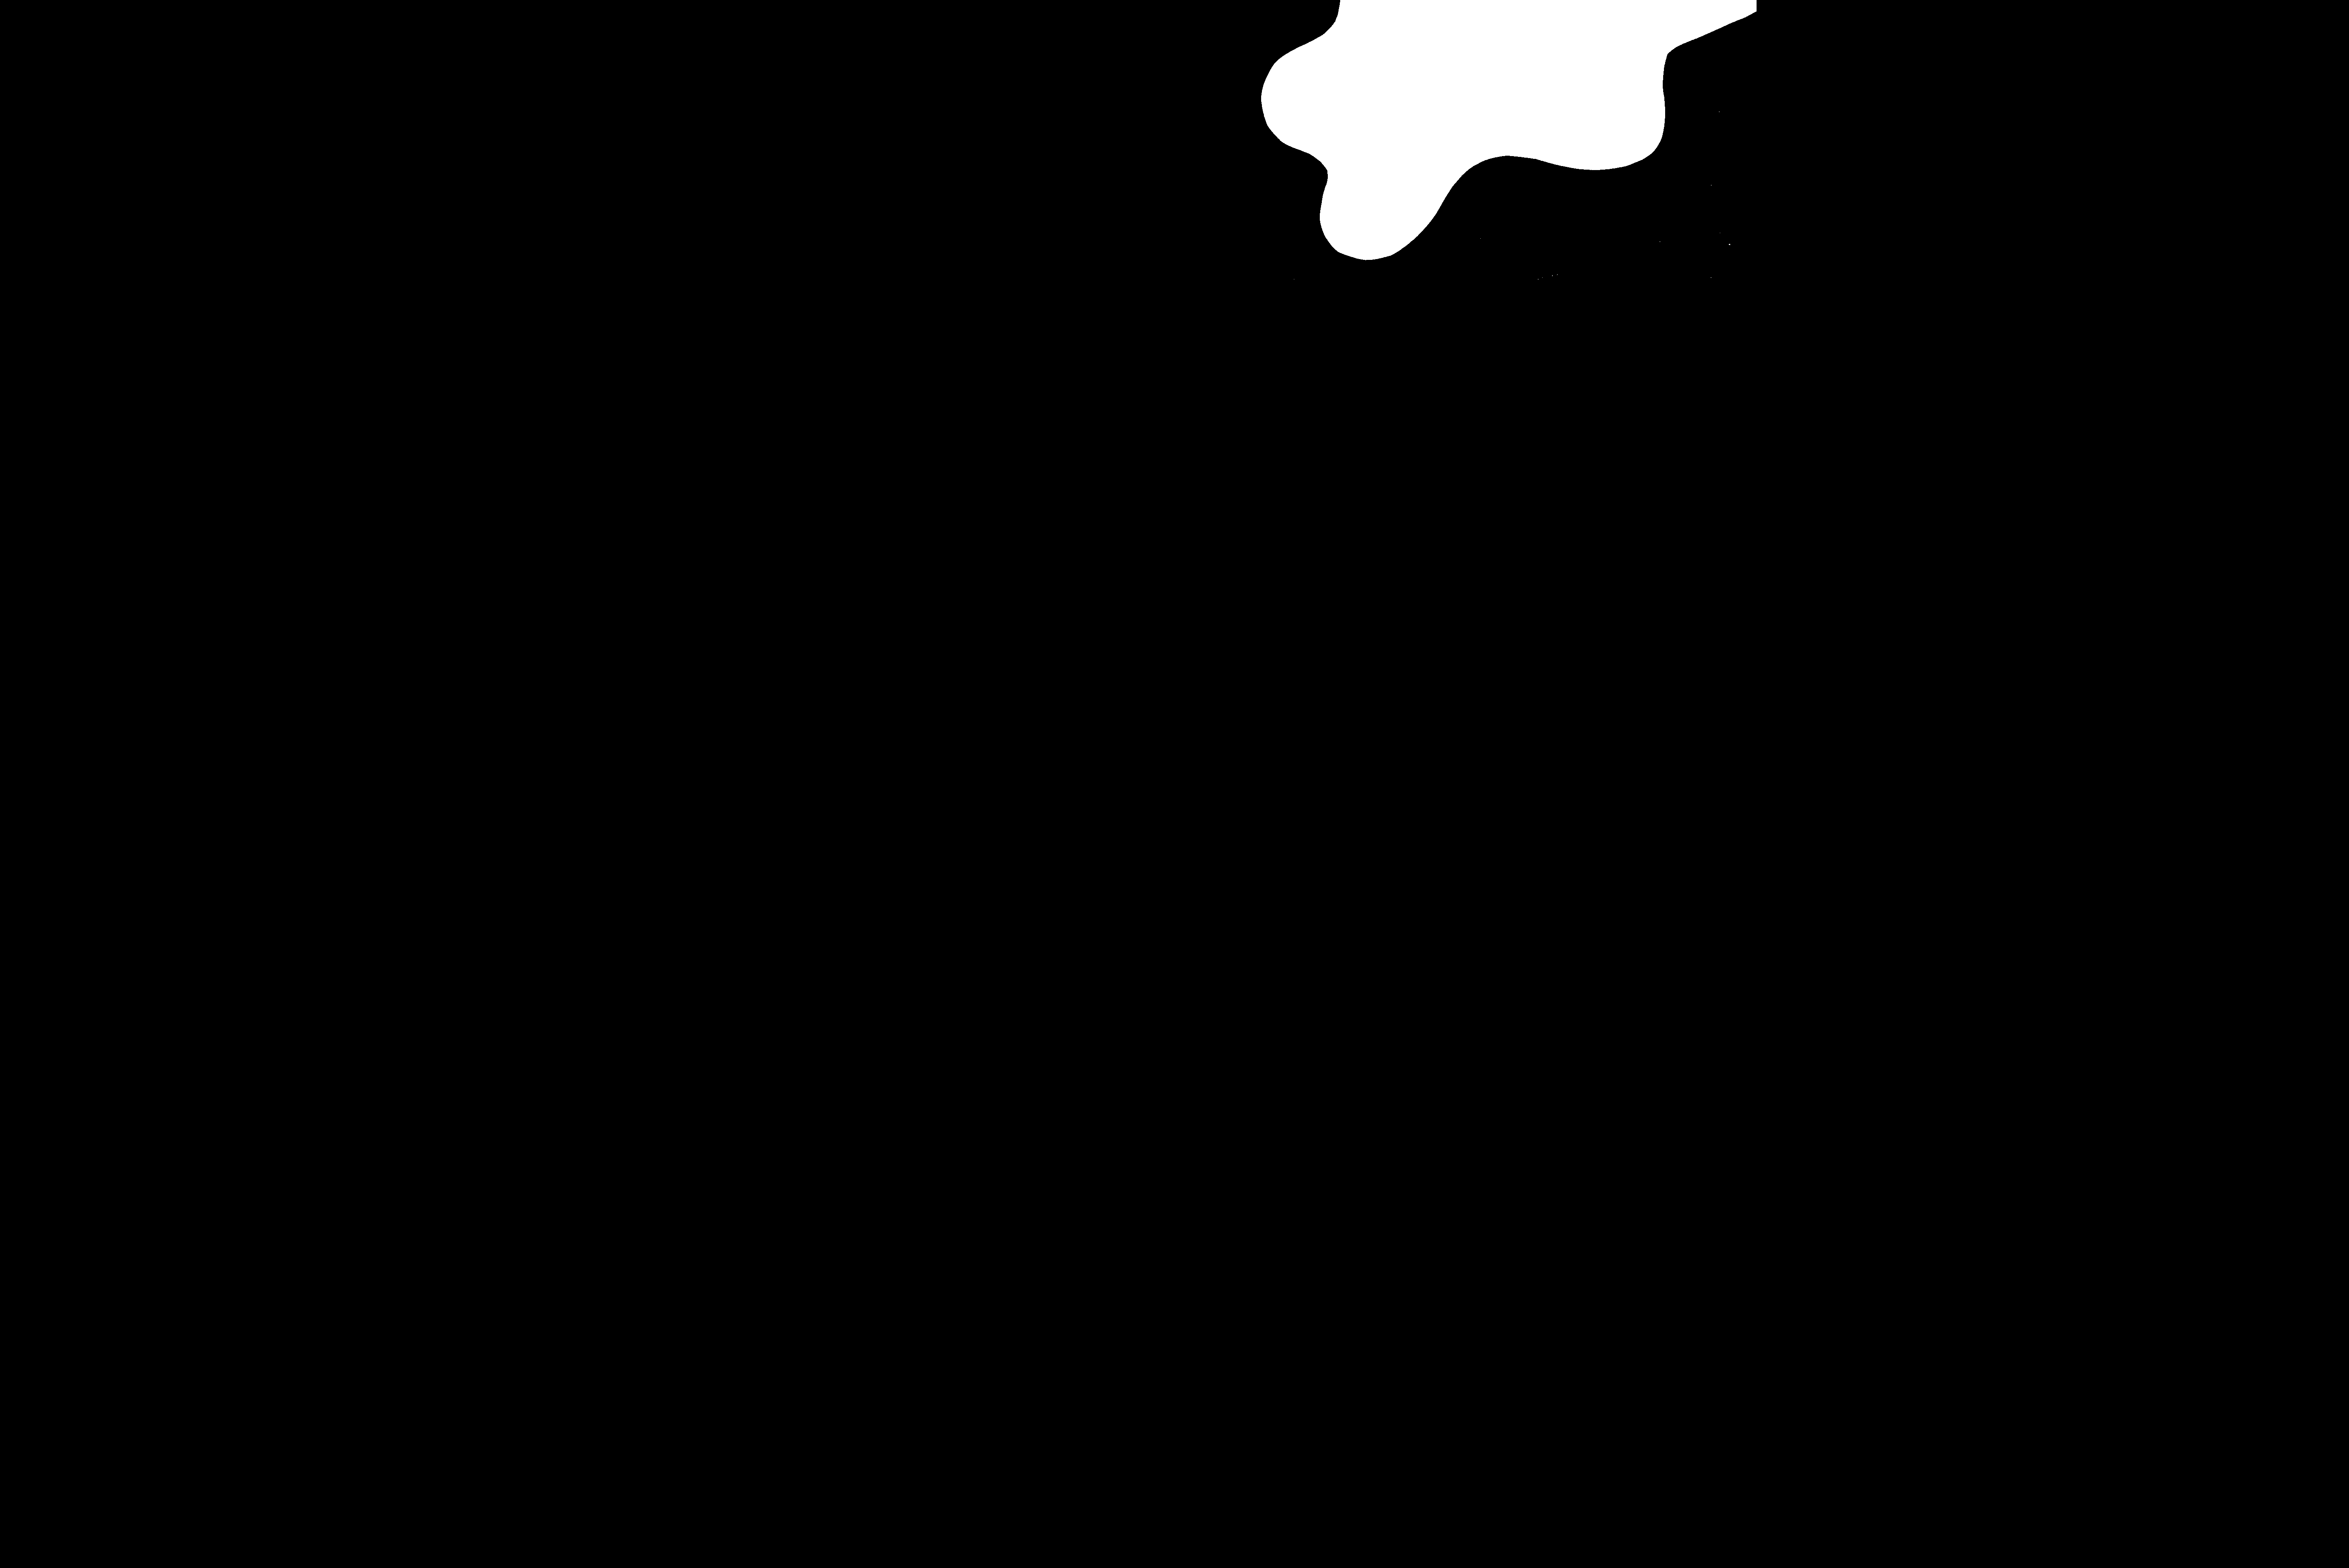

In [44]:
# Eliminación de píxeles aislados
(N,M) = gris.shape
gris_ok = gris.copy()
for i in range(N):
    s = np.sum(gris[i,:])
    if s<10:
        gris_ok[i,:] = 0
cv2_imshow(gris_ok*255)

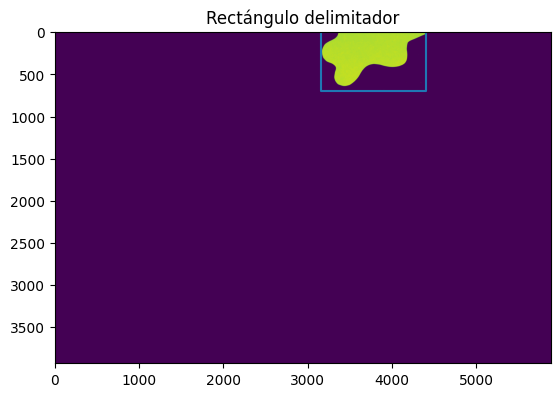

In [45]:
#Vamos a encontrar las coordenas del objeto para poder delimitarlo.

(N,M) = gris_ok.shape

i_min = 6000
i_max = 1
j_min = 6000
j_max = 1

for i in range(N):
    for j in range(M):
        if gris_ok[i, j] > 0:
          if i<i_min: i_min = i
          if i>i_max: i_max = i
          if j<j_min: j_min = j
          if j>j_max: j_max = j

# Dibujo del rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(gris_ok)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()

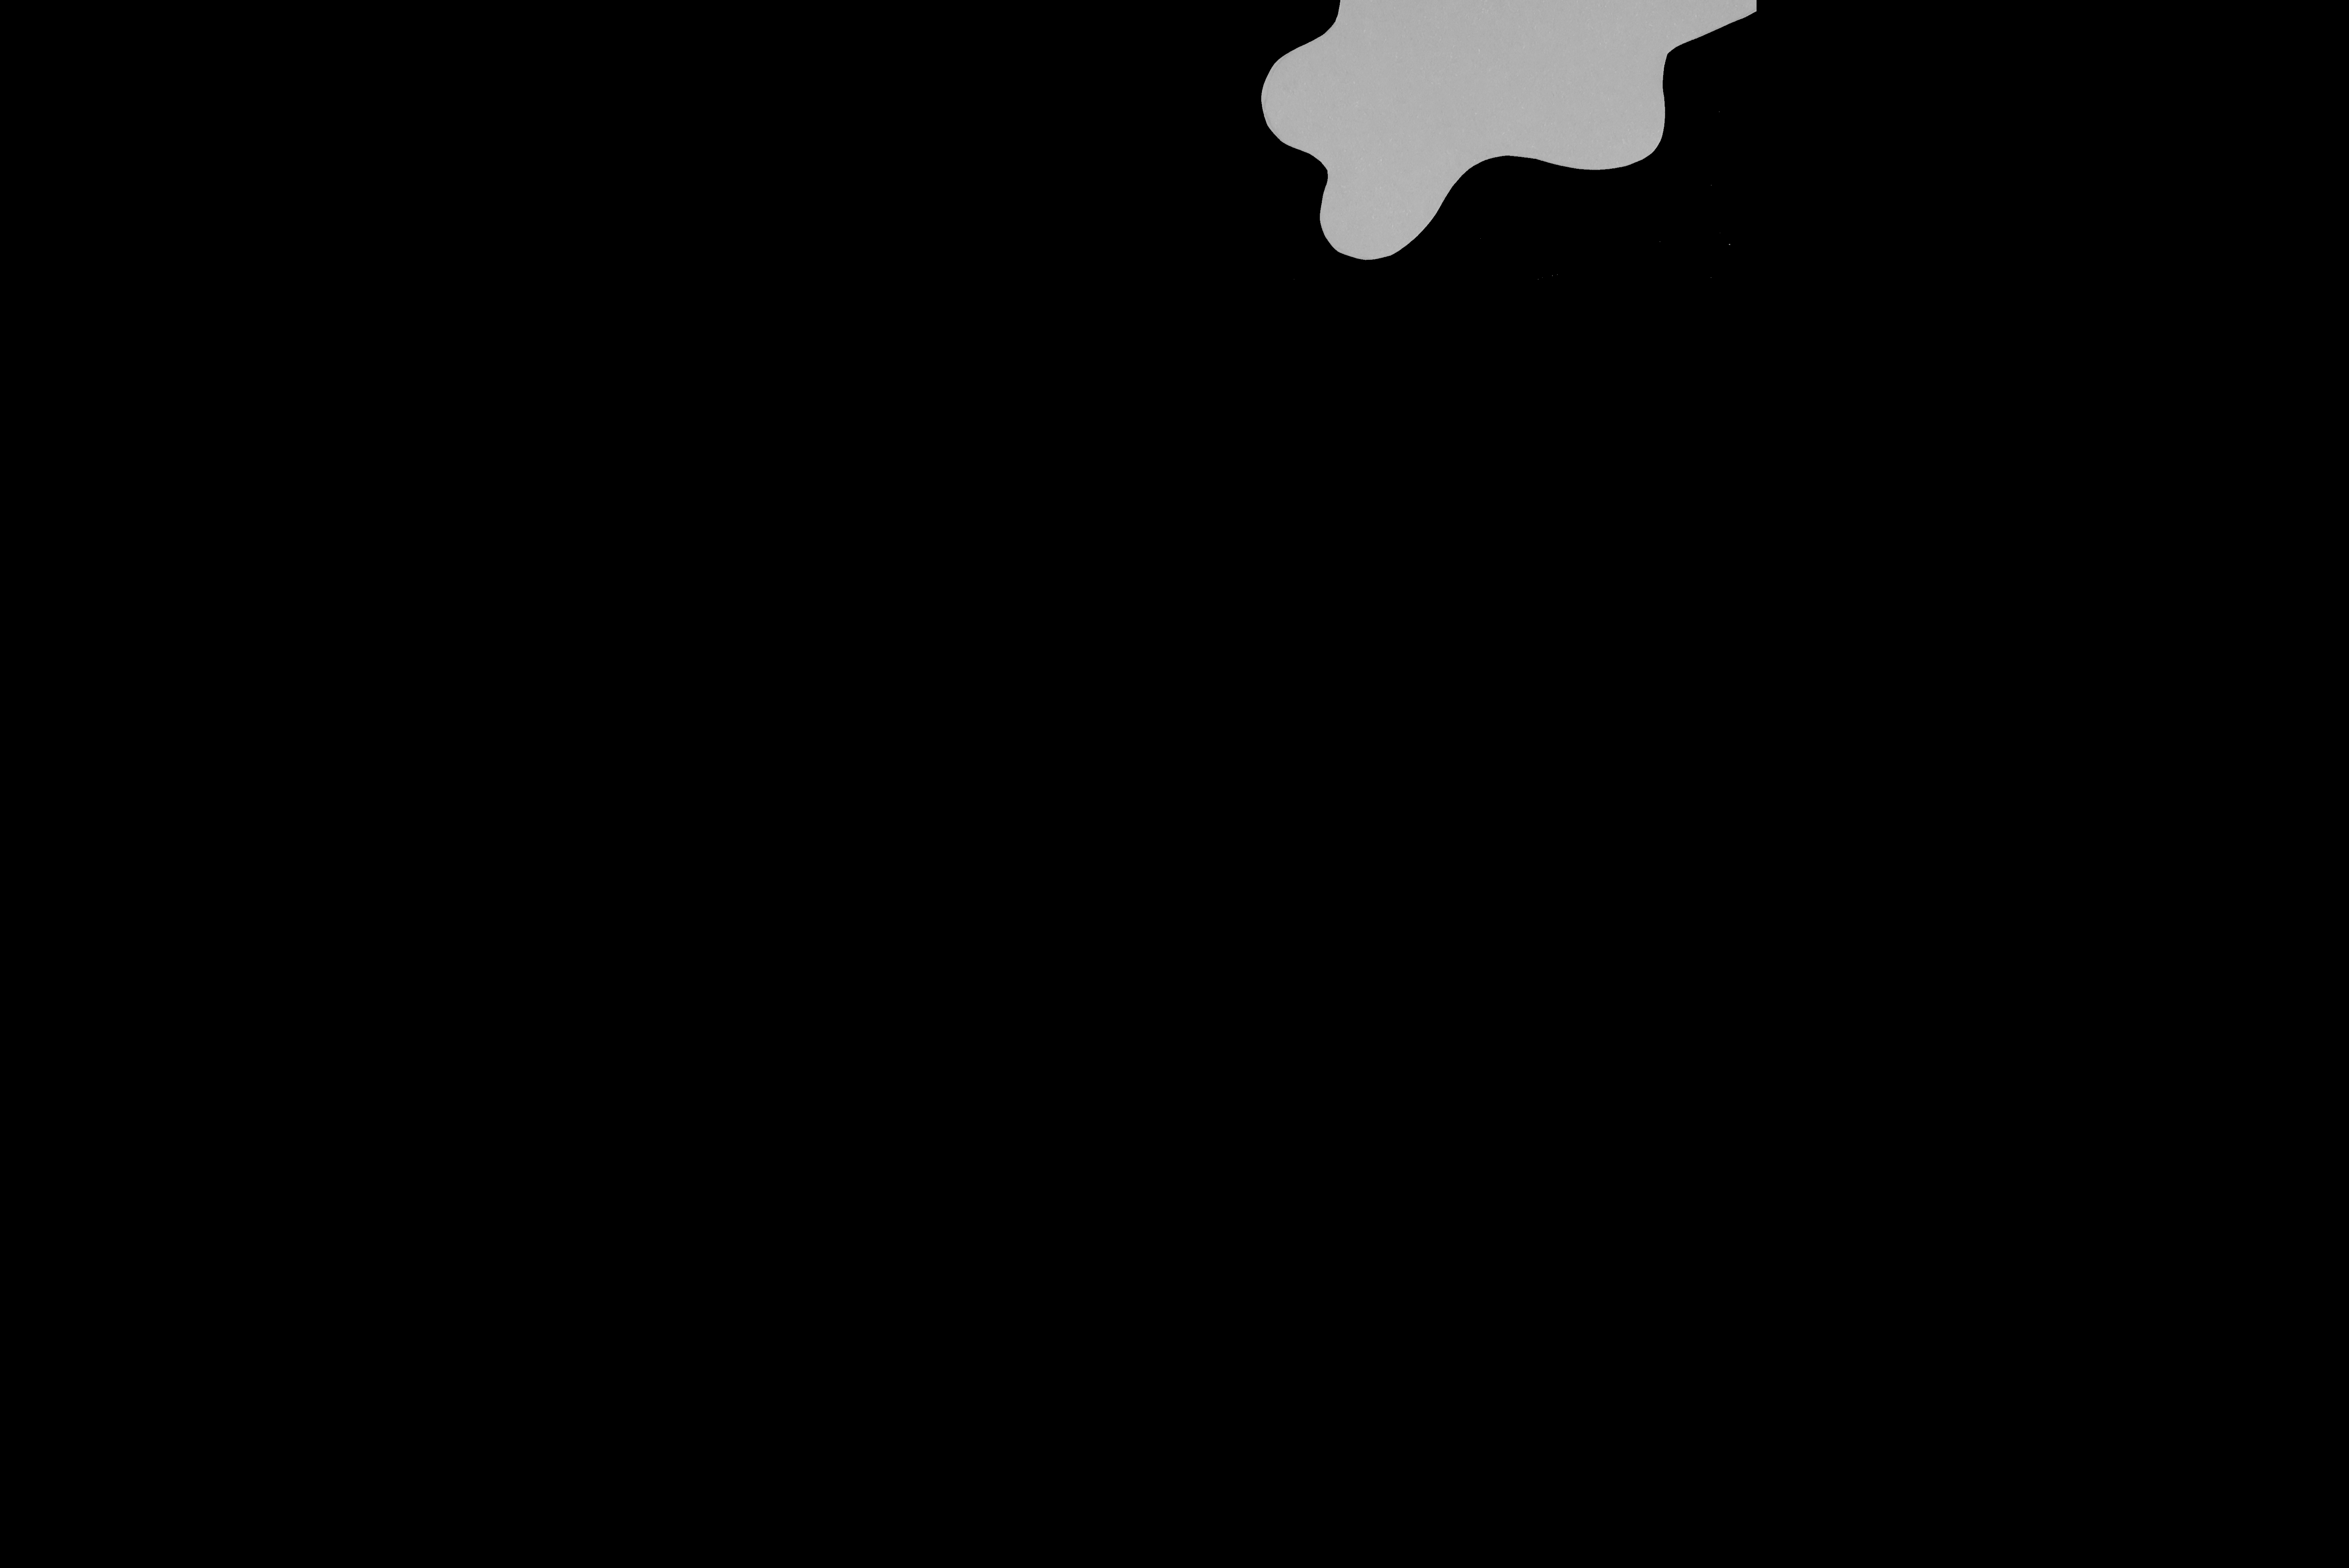

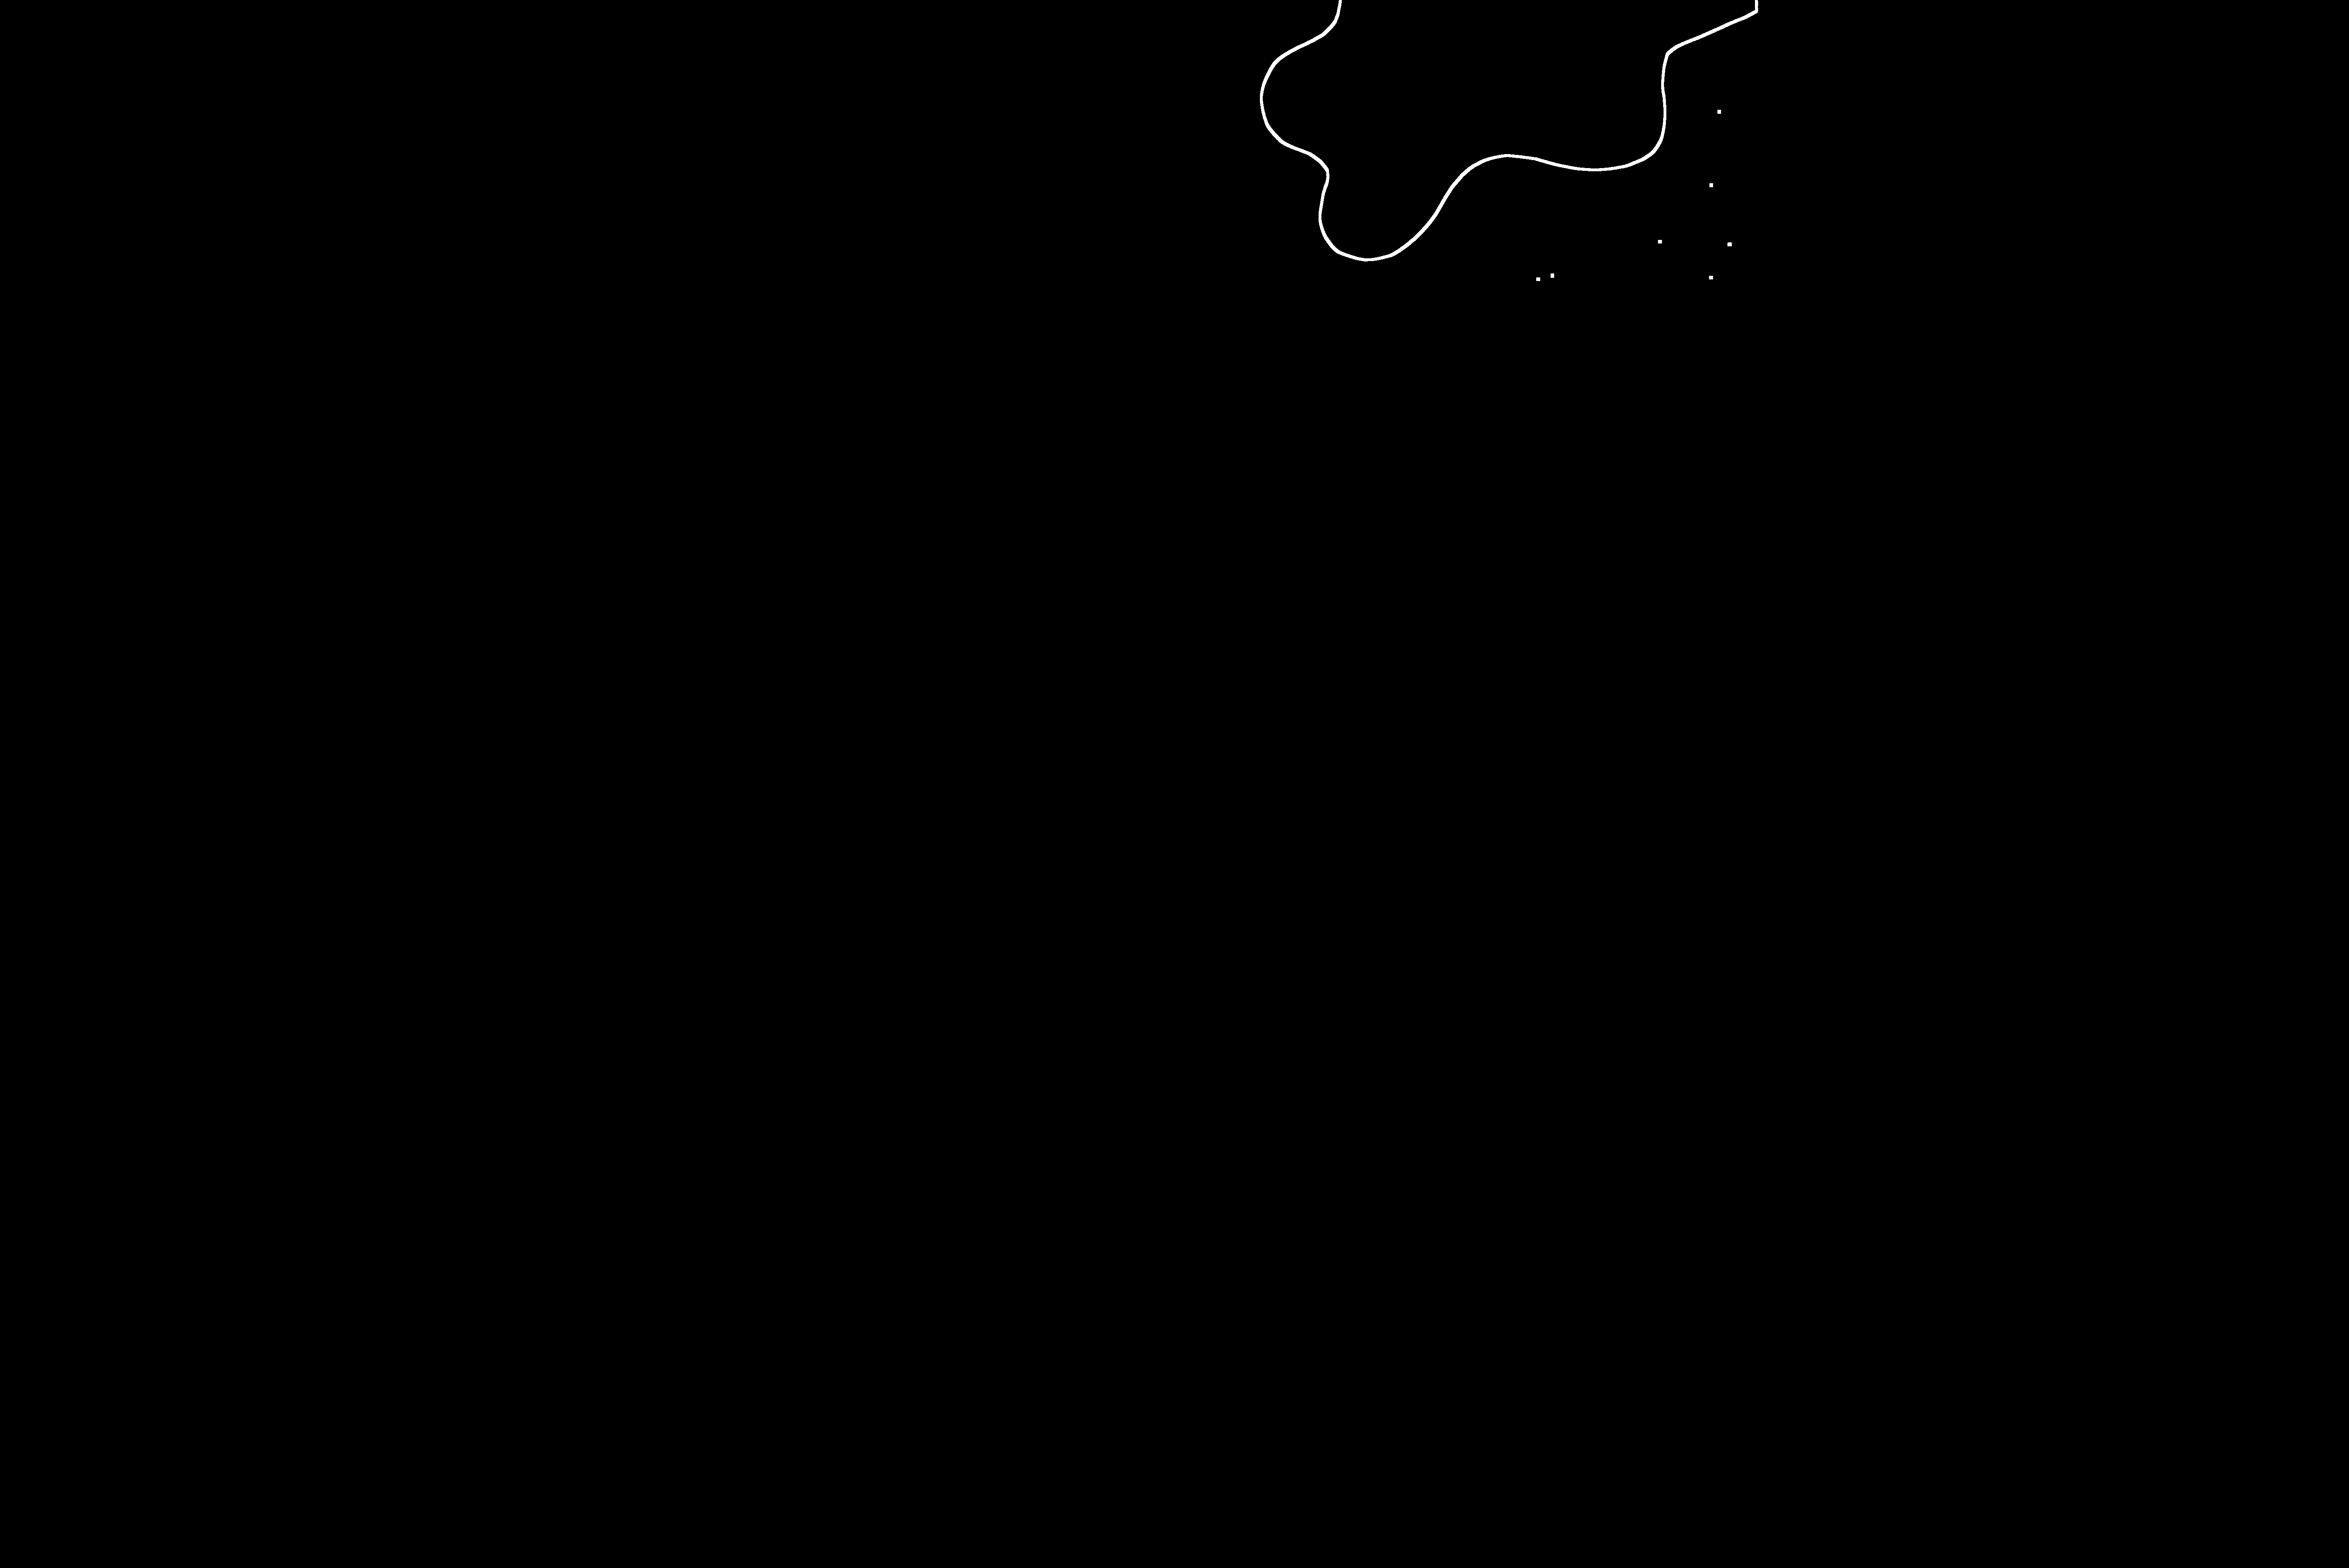

In [48]:
def obtener_borde_limpio_canny(imagen_gris):
    # 1. Aplicar un filtro Gaussiano para reducir el ruido
    # El kernel_size (3x3 en este caso) y sigmaX (desviación estándar en dirección X)
    # son parámetros que puedes ajustar según el nivel de ruido en tu imagen.
    imagen_suavizada = cv2.GaussianBlur(imagen_gris, (3, 3), 0)

    # 2. Aplicar el detector de bordes Canny
    # Los parámetros threshold1 y threshold2 son los umbrales inferior y superior, respectivamente.
    # Un borde se considera "fuerte" si su gradiente es mayor que threshold2, y se incluye directamente.
    # Un borde se considera "débil" si su gradiente está entre threshold1 y threshold2. Los bordes débiles
    # se incluyen solo si están conectados a un borde fuerte.
    # Puedes experimentar con estos valores para obtener el mejor resultado para tus imágenes.
    bordes_canny = cv2.Canny(imagen_suavizada, 100, 200)

    # 3. Opcional: Dilatar ligeramente el borde para hacerlo más visible
    # Esto puede ayudar a "cerrar" pequeños huecos y hacer el borde más continuo.
    kernel = np.ones((7, 7), np.uint8)
    bordes_dilatados = cv2.dilate(bordes_canny, kernel, iterations=1)

    return bordes_dilatados

# Ejemplo de uso:
if __name__ == '__main__':
    # Cargar tu imagen
    imagen_original = imagen_segmentada_en_a

    # Convertir a escala de grises
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

    # Obtener el borde limpio usando Canny
    borde_limpio = obtener_borde_limpio_canny(imagen_gris)

    # Mostrar la imagen original y el borde detectado
    cv2_imshow(imagen_gris)
    print("")
    cv2_imshow(borde_limpio)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [58]:
# Resultado final con bordes en rojo

ultimo_resultado = abstracto3.copy()

#print(ultimo_resultado.shape)
#print(borde_limpio.shape)
(N,M) = borde_limpio.shape
#print(N,M)
#print (borde_limpio)

#unique_elements = np.unique(borde_limpio)
#print("Unique elements in 'borde_limpio':", unique_elements)

for i in range(N):
    for j in range(M):
        if borde_limpio[i,j]==255:
            #print(i , j)
            ultimo_resultado[i,j,:] = [0,0,255]
cv2_imshow(ultimo_resultado)

